In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack, hstack
import fitsio
from astropy.io import fits

import desimodel.io
from bokeh.models import ColumnDataSource

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

__Locate Nightwatch QA output and PlateMaker file__

In [3]:
qapath = '/exposures/nightwatch/20191126/00030156/qa-00030156.fits'
fapath = '/exposures/desi/20191126/00030081/fiberassign-063068.fits'

-------

In [3]:
qa = Table(fits.getdata('/exposures/nightwatch/20191126/00030156/qa-00030156.fits', extname='PER_CAMFIBER'))
fa = Table(fits.getdata('/exposures/desi/20191126/00030081/fiberassign-063068.fits', extname='FIBERASSIGN'))

qa = join(fa, qa, 'FIBER')

skymask = (qa['CMX_TARGET'] & 2**32 > 0)
print('# sky fibers:', np.sum(skymask))

# sky fibers: 0


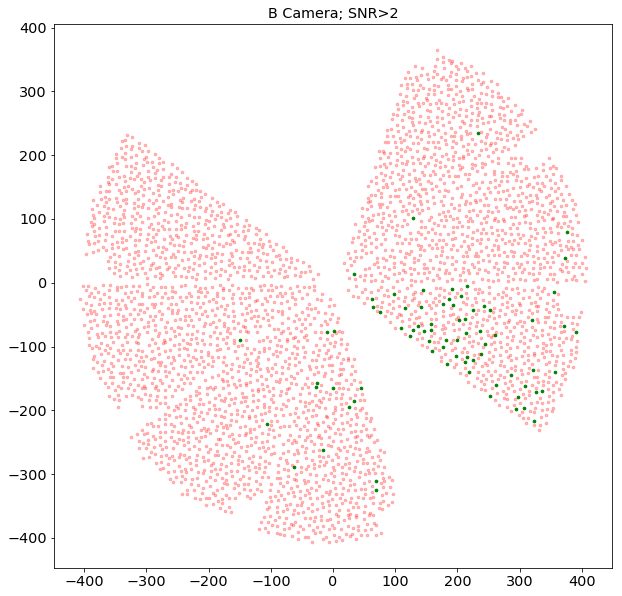

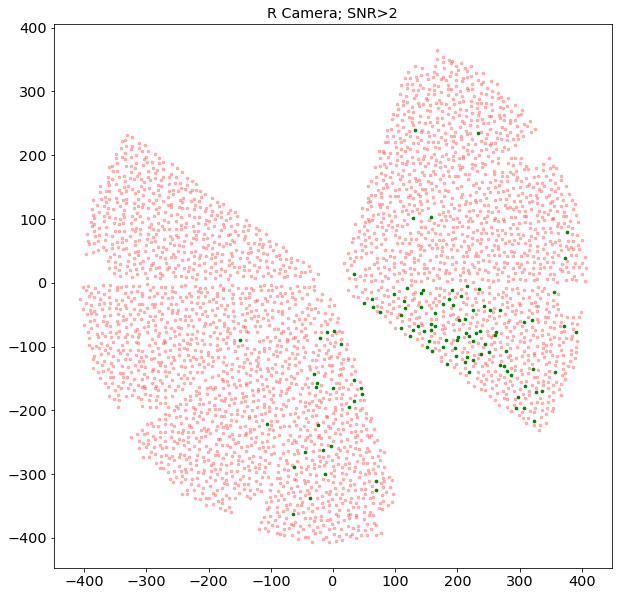

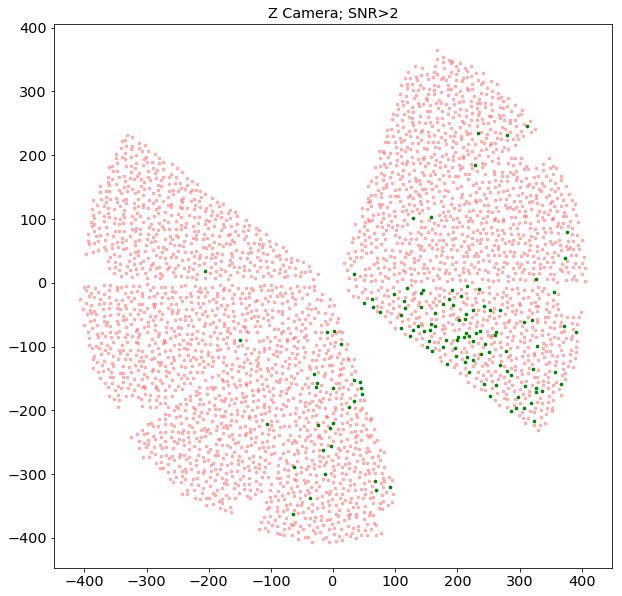

In [10]:
camera = 'Z'
snr_cut = 2

snmask = (qa['MEDIAN_CALIB_SNR']>snr_cut)

for camera in ['B', 'R', 'Z']:
    cammask = qa['CAM']==camera
    plt.figure(figsize=(10, 10))
    mask = cammask & snmask & (~skymask)
    plt.scatter(qa['FIBERASSIGN_X'][mask], qa['FIBERASSIGN_Y'][mask], s=7, c='green')
    mask = cammask & (~snmask) & (~skymask)
    plt.scatter(qa['FIBERASSIGN_X'][mask], qa['FIBERASSIGN_Y'][mask], s=7, c='red', alpha=0.25)
    mask = cammask & skymask
    plt.scatter(qa['FIBERASSIGN_X'][mask], qa['FIBERASSIGN_Y'][mask], s=8, c='cyan', alpha=1)
    plt.title('{} Camera; SNR>{}'.format(camera, snr_cut))
    # plt.axis('off')
    plt.show()